xの値: [0.         1.57079633 3.14159265 4.71238898 6.28318531]
yの値: [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]


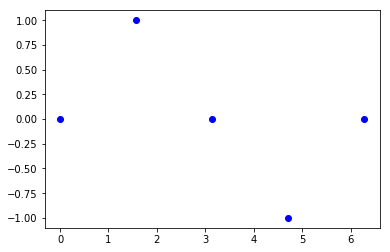

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#サンプルデータ数の指定
n = 5
#xを0から2πまでの範囲でn分割を行う
x = np.linspace(0, 2*np.pi, n)
print('xの値:', x)
#xをsin関数に入れて出力値を変数yとする
y = np.sin(x)
print('yの値:', y)
sin = pd.Series(y, index=x)
#x,yのプロット
plt.plot(x, y, 'bo') 

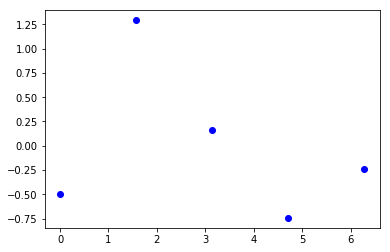

In [253]:
#ノイズありのデータを生成
noise = sin + 0.3 * np.random.randn(n)

#オリジナルの点にノイズを加えた点のプロット
plt.plot(x, noise, 'bo') 

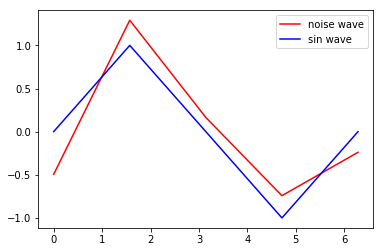

In [254]:
##ノイズなしの点とノイズ有りの点の比較
sdf = pd.DataFrame({'sin wave': sin, 'noise wave': noise})
sdf.plot(color=('r','b'))

In [255]:
#データセットを学習用とテスト用に分割
#※今回は全データを学習データに使うため、必要ないが、これはよく使う関数なめ記述
#text_size=0.0を好きな割合に変えることにより、その割合で学習データとテストデータに分割できる
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.0, random_state=0)
print('x_train:', x_train)
print('y_train', y_train)

x_train: [3.14159265 0.         1.57079633 4.71238898 6.28318531]
y_train [ 1.2246468e-16  0.0000000e+00  1.0000000e+00 -1.0000000e+00
 -2.4492936e-16]


In [256]:
###多項式回帰の実装(M = 0)
#パラメータの初期化
w = np.random.rand(1)
print(w)

#データの標準化を行うための準備
mu = x_train.mean()
sigma = x_train.std()
#標準化を行う関数
def standardize(x):
    return (x - mu) / sigma

#データの標準化
z_train = standardize(x_train)

#学習データを行列に変換する関数(定数項は1に設定)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0])]).T

#学習データを行列に変換
X = to_matrix(z_train)
#変換結果の確認
print(X)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

[0.98666155]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [257]:
#学種率を10^(-3)に設定
lr = 1e-3
#カウントを0に設定
count = 0
#最初の誤差を変数errorに代入
error = E(X, y_train)

#countが2000になるまで学習を行う
while count < 2000:
    #パラメータの更新式
    w = w - lr * np.dot(f(X) - y_train, X)
    #パラメータを更新した後の誤差
    current_error = E(X, y_train)
    #前の誤差とパラメータを更新した後の誤差の差
    diff = error - current_error
    #誤差をパラメータ更新後の誤差に更新
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

100回目の誤差:1.8930845222462127
200回目の誤差:1.3277243509008245
300回目の誤差:1.1202610139331888
400回目の誤差:1.0441307197115033
500回目の誤差:1.0161941127765413
600回目の誤差:1.0059425563492677
700回目の誤差:1.0021806675334122
800回目の誤差:1.0008002130079698
900回目の誤差:1.0002936444223216
1000回目の誤差:1.0001077551175772
1100回目の誤差:1.000039541583226
1200回目の誤差:1.000014510093248
1300回目の誤差:1.0000053245922116
1400回目の誤差:1.0000019539007594
1500回目の誤差:1.0000007169991665
1600回目の誤差:1.0000002631084526
1700回目の誤差:1.0000000965497045
1800回目の誤差:1.0000000354296694
1900回目の誤差:1.0000000130011941
2000回目の誤差:1.00000000477089


In [258]:
#M=0のときの最終誤差
print('最終誤差:', error)

最終誤差: 1.00000000477089


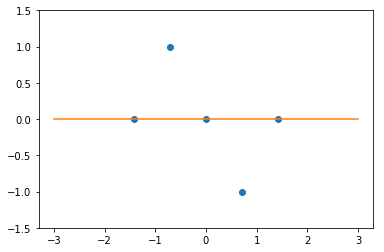

In [259]:
#M=0のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [260]:
###多項式回帰の実装(M = 1)
#パラメータの初期化
w = np.random.rand(2)

#標準化
z_train = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [261]:
count = 0
error = E(X, y_train)

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = E(X, y_train)
    diff = error - current_error
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

100回目の誤差:1.9279970771944845
200回目の誤差:1.2139273503607715
300回目の誤差:0.9518938788412724
400回目の誤差:0.8557386469131317
500回目の誤差:0.8204537324572068
600回目の誤差:0.8075056571086663
700回目の誤差:0.8027542595832197
800回目の誤差:0.8010106970971267
900回目の誤差:0.8003708832051866
1000回目の誤差:0.80013609849309
1100回目の誤差:0.8000499424065645
1200回目の誤差:0.8000183267567246
1300回目の誤差:0.8000067251467269
1400回目の誤差:0.8000024678451938
1500回目の誤差:0.8000009055950965
1600回目の誤差:0.8000003323152038
1700回目の誤差:0.8000001219456633
1800回目の誤差:0.8000000447489148
1900回目の誤差:0.8000000164209643
2000回目の誤差:0.8000000060258011


In [262]:
#M=1のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.8000000060258011


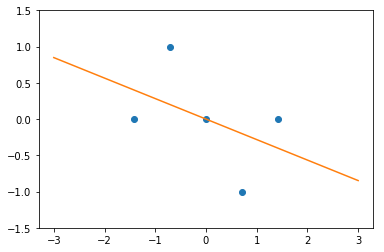

In [263]:
#M=1のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [264]:
###多項式回帰の実装(M = 3)
#パラメータの初期化
w = np.random.rand(4)

train_z = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [265]:
count = 0
error = E(X, y_train)

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = E(X, y_train)
    diff = np.abs(error - current_error)
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

100回目の誤差:1.2770953731712542
200回目の誤差:0.6615180816103412
300回目の誤差:0.5688034873642508
400回目の誤差:0.518428222180414
500回目の誤差:0.4751898326118788
600回目の誤差:0.4357947283484308
700回目の誤差:0.39968670219857305
800回目の誤差:0.3665723552557425
900回目の誤差:0.33620177421997877
1000回目の誤差:0.30834745483069065
1100回目の誤差:0.28280089671794495
1200回目の誤差:0.25937089069919345
1300回目の誤差:0.23788207314172996
1400回目の誤差:0.2181736113892359
1500回目の誤差:0.2000979992566638
1600回目の誤差:0.1835199525371772
1700回目の誤差:0.168315396122685
1800回目の誤差:0.1543705351157936
1900回目の誤差:0.14158100295519963
2000回目の誤差:0.12985108015994334


In [266]:
#M=3のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.12985108015994334


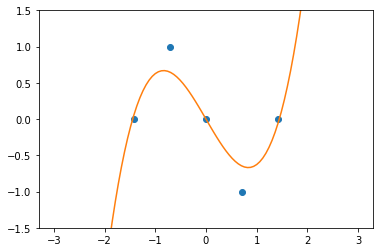

In [267]:
#M=3のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [268]:
###多項式回帰の実装(M = 9)
#パラメータの初期化
w = np.random.rand(10)

train_z = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3, x**4, x ** 5, x ** 6, x** 7, x ** 8, x**9]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [269]:
count = 0
error = E(X, y_train)

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = E(X, y_train)
    diff = np.abs(error - current_error)
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

100回目の誤差:2.723303887066481
200回目の誤差:1.901935458152323
300回目の誤差:1.3684955581720206
400回目の誤差:1.0075856908641
500回目の誤差:0.7545432519684293
600回目の誤差:0.5719183885633478
700回目の誤差:0.43715796351272096
800回目の誤差:0.3360866883398095
900回目の誤差:0.25940309155893143
1000回目の誤差:0.20075574169836077
1100回目の誤差:0.15565724572860606
1200回目の誤差:0.12084958290220202
1300回目の誤差:0.09391797965856169
1400回目の誤差:0.07304563300013611
1500回目の誤差:0.056851129406412765
1600回目の誤差:0.04427643552953132
1700回目の誤差:0.03450718376719223
1800回目の誤差:0.026914471121755178
1900回目の誤差:0.02101154354629408
2000回目の誤差:0.016421110919259418


In [270]:
#M=9のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.016421110919259418


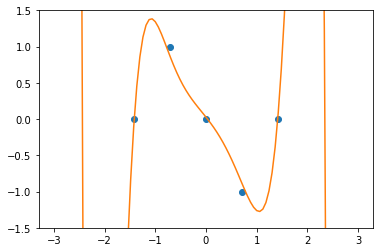

In [271]:
#M=9のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()